# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set bitcoin and ethereum holdings
my_btc = 1.2  
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"

In [5]:
# Fetch current BTC price
response_btc = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")

In [6]:
# Fetch current ETH price
response_eth = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD")

In [7]:
# Formatting as json
data_btc = response_btc.json()
data_eth = response_eth.json()

In [8]:
# Add indents to btc json file and output to screen
print(json.dumps(data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18934256,
            "total_supply": 18934256,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42191.0,
                    "volume_24h": 20456028123,
                    "market_cap": 796724327519,
                    "percentage_change_1h": 0.52783867082206,
                    "percentage_change_24h": 1.51477644586812,
                    "percentage_change_7d": -1.37087135378583,
                    "percent_change_1h": 0.52783867082206,
                    "percent_change_24h": 1.51477644586812,
                    "percent_change_7d": -1.37087135378583
                },
                "CAD": {
                    "price": 52717.6545,
                    "volume_24h": 25559807139.6885,
                    "ma

In [9]:
# Add indents to btc json file and output to screen
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119226787,
            "total_supply": 119226787,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3137.62,
                    "volume_24h": 13493344865,
                    "market_cap": 372759216934,
                    "percentage_change_1h": 1.17690389877049,
                    "percentage_change_24h": 0.779784494200921,
                    "percentage_change_7d": -3.3513507222276,
                    "percent_change_1h": 1.17690389877049,
                    "percent_change_24h": 0.779784494200921,
                    "percent_change_7d": -3.3513507222276
                },
                "CAD": {
                    "price": 3920.45619,
                    "volume_24h": 16859934408.8175,
                    

In [10]:
# Set btc and eth prices to variables
price_btc = data_btc["data"]["1"]["quotes"]["USD"]["price"]
price_eth = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

In [11]:
# Compute current value of crypto portfolio
my_btc_value = price_btc*my_btc
my_eth_value = price_eth*my_eth
crypto_value = my_btc_value + my_eth_value

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"Total balance: ${crypto_value}")

The current value of your 1.2 BTC is $50629.20
The current value of your 5.3 ETH is $16629.39
Total balance: $67258.586


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-18", tz="America/New_York").isoformat()

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [18]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [19]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    end=today,
    limit = 1000,
).df

In [20]:
# Preview DataFrame
df_portfolio.sort_index(ascending = False, inplace = True)
df_portfolio.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2022-01-18 00:00:00-05:00  111.81  111.860  111.470  111.49  7390142.0   
2022-01-14 00:00:00-05:00  112.53  112.545  112.150  112.17  8362916.0   
2022-01-13 00:00:00-05:00  112.60  112.800  112.510  112.80  7925476.0   
2022-01-12 00:00:00-05:00  112.72  112.785  112.580  112.60  6159865.0   
2022-01-11 00:00:00-05:00  112.33  112.630  112.265  112.61  5723770.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2022-01-18 00:00:00-05:00  459.73  459.96  455.31  456.53  95565773.0  
2022-01-14 00:00:00-05:00  461.19  465.09  459.90  464.68  84363989.0  
2022-01-13 00:00:00-05:00  472.21  472.88  463.44  464.54  79071832.0  
2022-01-12 00:00:00-05:00  471.59  473.20  468.94  471.06  58775301.0  
2022-01-11 00:00:00-05:00  465.22  469.85  462.05  469.74  63249917.0

In [21]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.49
Current SPY closing price: $456.53


In [56]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
shares_value = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"Total value: ${shares_value}")

The current value of your 50 SPY shares is $22826.50
The current value of your 200 AGG shares is $22298.00
Total value: $45124.5


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

In [30]:
# Consolidate financial assets data
portfolio_values = {
    "amount": [crypto_value, shares_value]}

In [31]:
# Set the asset names
types = ["crypto", "shares"]

In [36]:
# Create the shares DataFrame
df_savings = pd.DataFrame(portfolio_values, index = types)

In [39]:
# Display savings DataFrame
display(df_savings)

,amount
crypto,67258.586
shares,45124.500


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

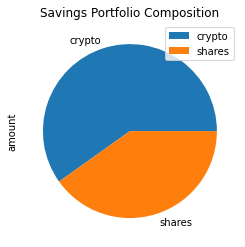

In [62]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")

In [70]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [70]:
# Calculate total amount of savings
total_savings = crypto_value + shares_value

In [71]:
# Use if conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.
def savings(x):
    if x>=emergency_fund:
        print(f"Congratulations! Your savings of ${x} are at a level 3x or more than monthly income.")
    else:
        print(f"Whoops! Your savings of ${x} are ${emergency_fund - x} away from meeting 3x monthly income")

# Validate saving health
savings(total_savings)

Congratulations! Your savings of $112383.086 are at a level 3x or more than monthly income.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
today = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")